# Board Games
## Kathryn Clark
## December 18, 2017

Can we identify characteristics of board games that earn them higher ratings?

### Overview and Dataset
From the ancient game of Backgammon to the modern games of today, board games have been an integral aspect of life. Whether playing with friends or family, board games allow friendly competition between people and encourage all sorts of skills, from strategy and coordination to probability and storytelling.

As a company or designer creating new games, it is valuable to know what characteristics consumers are looking for and rating highly.

This analysis uses a dataset of 4999 games scraped from boardgamegeek.com at the end of March 2017 (data is available here: https://www.kaggle.com/mrpantherson/board-game-data). Board Game Geek (BGG) is a website dedicated to providing information on all board games in one place. They collect information (such as minimum age, average play time, and number of players) provided by the publisher of a game and have a large community base of registered users who vote and comment on games, providing feedback on the enjoyability of a game.

Using the available information, I will examine what characteristics of a game earn it higher ratings and purchases. It should be noted that BGG provides two different ratings â the true average rating from the members of their community and a rating they call the âgeek rating.â From their FAQ section on their website, BGG says:

What is the Difference Between BGG Rating and User Rating?
If you look at a list of games within BGG you may see a BGG Rating number between 1 and 10. If you then click on that game and go to the game's main page you will see a User Rating and an Average Rating. Most of the time, the BGG Rating number will be different from the User and Average Ratings. Why is this? The User Rating of a game is the Average Rating rounded down to 1 decimal point. The Average Rating for a game is the average of all ratings from registered BGG users that the game has received, calculated by adding up all individual ratings and dividing by the number of ratings. The BGG Rating is based on the Average Rating, but the number is altered. BoardGameGeek's ranking charts are ordered using the BGG Rating. To prevent games with relatively few votes climbing to the top of the BGG Ranks, artificial "dummy" votes are added to the User Ratings. These votes are currently thought to be 100 votes equal to the mid range of the voting scale: 5.5, but the actual algorithm is kept secret to avoid manipulation. The effect of adding these dummy votes is to pull BGG Ratings toward the mid range. Games with a large number of votes see their BGG Rating alter very little from their Average Rating, but games with relatively few user ratings will see their BGG Rating move considerably toward 5.5. This is known as "Bayesian averaging" and a quick search of both BGG and/or the Web will reveal much discussion on the topic. In effect, usually the games with many votes will Rank higher than those games with the same Average Rating but fewer votes.

In other words, the BGG geek rating attempts to adjust for a potential issue of over or under rating a game when it has few rating (because a single userâs opinion matters much more and could easily pull the rating up or down significantly). The relationship between geek rating, average rating, and number of votes has been examined elsewhere (https://www.kaggle.com/tommasorigon/geek-ratings-vs-average-ratings).

Potential labels to look at in this dataset are Average Rating, Geek Rating, and Number Owned. Both ratings and the number owned come from the sample of individuals who use BGG, potentially providing a biased sample. However, this individuals also are most likely to have the most exposure and experience with board games and their ratings are potentially a more accurate representation of the true enjoyability of the game. Number Owned is also determined from the sample on BGG, but could be used as a proxy for purchases.

Other variables included in the dataset include Rank (a number 1 â 4999 that assigns a rank to a game based on its geek rating), game ID, BGG url and image url, Name (of the game), minimum players, maximum players, average play time, number of votes, minimum play time, maximum play time, year, minimum age, mechanics used in gameplay, categories that describe the game, game designers, and a weight variable that identifies the complexity of the game on a scale of 1 â 5. 

Analysis of this data, using average rating as the label, is limited by the the small size and relatively few characteristic variables available (after excluding characteristics with too many levels). However, I do find that the most important characteristic towards a game earning high ratings is weight (complexity), followed by year.

### Explore and Clean the data

In [68]:
# load in data
from azureml import Workspace
ws = Workspace()
experiment = ws.experiments['fe4d68b317af4d2087dd639770ddbe70.f-id.c2a1b34608c74bd5b3903c91b29c3010']
ds = experiment.get_intermediate_dataset(
    node_id='c64144f4-2e4d-4910-9b1c-859a98901547-930',
    port_name='Results dataset',
    data_type_id='GenericCSV'
)
frame = ds.to_dataframe()

In [111]:
frame.head()

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight
0,1,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66905,8.48904,18009,13,"Action Point Allowance System, Co-operative Pl...",29472,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8076
1,2,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.72977,8.30744,7309,14,"Action Point Allowance System, Auction/Bidding...",10007,"Card Game, Civilization, Economic",Vlaada ChvÃ¡til,4.3093
2,3,12333,Twilight Struggle,2,2,180,180,180,2005,8.35745,8.22021,27403,13,"Area Control / Area Influence, Campaign / Batt...",37382,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5317
3,4,120677,Terra Mystica,2,5,150,60,150,2012,8.29627,8.15458,24267,12,"Route/Network Building, Variable Phase Order, ...",27948,"Civilization, Economic, Fantasy, Territory Bui...","Jens DrÃ¶gemÃ¼ller, Helge Ostertag",3.9387
4,5,174430,Gloomhaven,1,4,150,90,150,2017,9.08970,8.15151,3978,12,"Action / Movement Programming, Campaign / Batt...",6057,"Adventure, Economic, Exploration, Fantasy, Fig...",Isaac Childres,3.7028


In [70]:
frame.describe()

,rank,game_id,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,owned,weight
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,2500.000000,75692.187638,2.034607,5.287257,105.557512,87.331666,105.154431,1996.336867,6.931999,6.064136,1698.150230,10.286257,2535.943589,2.344941
std,1443.231328,69633.472776,0.676155,15.780212,390.597862,318.086466,390.645270,143.338329,0.565580,0.480173,4094.167154,3.325281,5469.084888,0.800912
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,5.734290,5.626270,47.000000,0.000000,12.000000,0.000000
25%,1250.500000,8205.000000,2.000000,4.000000,30.000000,30.000000,30.000000,2002.000000,6.493225,5.704275,231.000000,8.000000,495.000000,1.735500
50%,2500.000000,43530.000000,2.000000,4.000000,60.000000,45.000000,60.000000,2009.000000,6.879950,5.881440,509.000000,10.000000,980.000000,2.288200
75%,3749.500000,144567.500000,2.000000,6.000000,112.500000,90.000000,100.000000,2014.000000,7.315050,6.264105,1368.500000,12.000000,2264.500000,2.888050
max,4999.000000,224316.000000,8.000000,999.000000,17280.000000,17280.000000,17280.000000,2018.000000,9.331670,8.489040,68505.000000,42.000000,96783.000000,4.904800


In [71]:
# import all the needed packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
# set parameters for figures
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["xtick.labelsize"] = 7

There are far too many different designers to include that variable in the model so it is being left out entirely. Mechanics and Category also have around 100 options each with some options being represented by only one or very few games. For the relatively small sample size of games, the high number of levels of mechanics and category will be problematic in the model so they will also be excluded. However, I will include a summary measure of the number of options listed under each variable. This will capture some of the characteristics of the game and might proxy for how likely it comes up in online searches, though it is certainly not fully capturing all information about the game.

In [112]:
#mechanics = ["Dice Rolling", "Hand Management", "Variable Player Powers", "Set Collection", 
#             "Area Control / Area Influence", "Hex-and-Counter", "Card Drafting", "Modular Board", 
#             "Tile Placement", "Auction/Bidding", "Simultaneous Action Selection", "Action Point Allowance System", 
#             "Area Movement", "Simulation", "Partnerships", "Co-operative Play", "Grid Movement", 
#             "Worker Placement", "Point to Point Movement", "Route/Network Building", "Deck / Pool Building", 
#             "Campaign / Battle Card Driven", "Secret Unit Deployment", "Press Your Luck", "Pick-up and Deliver", 
#             "Memory", "Player Elimination", "Take That", "Pattern Building", "Trading", "Role Playing", 
#             "Variable Phase Order", "Action / Movement Programming", "Stock Holding", "Roll / Spin and Move", 
#             "Voting", "Commodity Speculation", "Betting/Wagering", "Trick-taking", "Pattern Recognition", 
#             "Area Enclosure", "Chit-Pull System", "Storytelling", "Paper-and-Pencil", "Acting", "Time Track", 
#             "Rock-Paper-Scissors", "Area-Impulse", "Line Drawing", "Crayon Rail System", "Singing"]

# create a dataframe with mechanics dummies from the mechanics list column
mechanics_frame = frame['mechanic'].str.get_dummies(sep=",")
mechanics_frame.head()

,Action Point Allowance System,Area Control / Area Influence,Area Enclosure,Area Movement,Area-Impulse,Auction/Bidding,Betting/Wagering,Campaign / Battle Card Driven,Card Drafting,Chit-Pull System,...,Take That,Tile Placement,Time Track,Trading,Trick-taking,Variable Phase Order,Variable Player Powers,Voting,Worker Placement,none
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# sum across the mechanics dummies
mechanics_frame["mechanics_sum"] = mechanics_frame.sum(axis=1)
mechanics_frame.head()

,Action Point Allowance System,Area Control / Area Influence,Area Enclosure,Area Movement,Area-Impulse,Auction/Bidding,Betting/Wagering,Campaign / Battle Card Driven,Card Drafting,Chit-Pull System,...,Tile Placement,Time Track,Trading,Trick-taking,Variable Phase Order,Variable Player Powers,Voting,Worker Placement,none,mechanics_sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9


In [114]:
# correct the sum to be 0 if the listed mechanic was "none"
mechanics_frame.loc[mechanics_frame.none == 1, "mechanics_sum"] = 0
mechanics_frame.loc[mechanics_frame.none == 1].head()

,Action Point Allowance System,Area Control / Area Influence,Area Enclosure,Area Movement,Area-Impulse,Auction/Bidding,Betting/Wagering,Campaign / Battle Card Driven,Card Drafting,Chit-Pull System,...,Tile Placement,Time Track,Trading,Trick-taking,Variable Phase Order,Variable Player Powers,Voting,Worker Placement,none,mechanics_sum
716,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
793,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
893,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [115]:
# create a rank column for merging onto rest of data
mechanics_frame['rank'] = range(1, len(mechanics_frame) + 1)

# create a mini dataframe of only the sum variable and the rank key
mechs_mini = mechanics_frame.loc[:, 'mechanics_sum':'rank']
mechs_mini.head()

,mechanics_sum,rank
0,7,1
1,4,2
2,5,3
3,3,4
4,9,5


In [116]:
# categories = ['Abstract Strategy', 'Action / Dexterity', 'Adventure', 'Age of Reason', 'American Civil War', 'American Indian Wars',
#               'American Revolutionary War', 'American West', 'Ancient', 'Animals', 'Arabian', 'Aviation / Flight', 
#               'Bluffing', 'Book', 'Card Game', "Children's Game", 'City Building', 'Civil War', 'Civilization', 'Collectible Components',
#               'Comic Book / Strip', 'Deduction', 'Dice', 'Economic', 'Educational', 'Electronic', 'Environmental', 'Expansion for Base-game',
#               'Exploration', 'Fantasy', 'Farming', 'Fighting', 'Game System', 'Horror', 'Humor', 'Industry / Manufacturing', 
#               'Korean War', 'Mafia', 'Math', 'Mature / Adult', 'Maze', 'Medical', 'Medieval', 'Memory', 'Miniatures',
#               'Modern Warfare', 'Movies / TV / Radio theme', 'Murder/Mystery', 'Music', 'Mythology', 'Napoleonic',
#               'Nautical', 'Negotiation', 'Novel-based', 'Number', 'Party Game', 'Pike and Shot', 'Pirates', 'Political',
#               'Post-Napoleonic', 'Prehistoric', 'Print & Play', 'Puzzle', 'Racing', 'Real-time', 'Religious', 'Renaissance',
#               'Science Fiction', 'Space Exploration', 'Spies/Secret Agents', 'Sports', 'Territory Building', 'Trains',
#               'Transportation', 'Travel', 'Trivia', 'Video Game Theme', 'Vietnam War', 'Wargame', 'Word Game',
#               'World War I', 'World War II', 'Zombies', 'none'

# create a dataframe with the dummies for each category in the category list column, find the sum, and create the mini datframe to merge
cat_frame = frame['category'].str.get_dummies(sep=",")
cat_frame["cat_sum"] = cat_frame.sum(axis=1)
cat_frame.loc[cat_frame.none == 1, "cat_sum"] = 0
cat_frame['rank'] = range(1, len(cat_frame) + 1)
cat_mini = cat_frame.loc[:, 'cat_sum':'rank']
cat_mini.head()

,cat_sum,rank
0,2,1
1,3,2
2,3,3
3,4,4
4,6,5


In [117]:
# merge both sum cols into the main data (https://pandas.pydata.org/pandas-docs/stable/merging.html)
frame2 = pd.merge(frame, mechs_mini, on="rank")
frame2 = pd.merge(frame2, cat_mini, on="rank")
frame2.head()

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight,mechanics_sum,cat_sum
0,1,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66905,8.48904,18009,13,"Action Point Allowance System, Co-operative Pl...",29472,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8076,7,2
1,2,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.72977,8.30744,7309,14,"Action Point Allowance System, Auction/Bidding...",10007,"Card Game, Civilization, Economic",Vlaada ChvÃ¡til,4.3093,4,3
2,3,12333,Twilight Struggle,2,2,180,180,180,2005,8.35745,8.22021,27403,13,"Area Control / Area Influence, Campaign / Batt...",37382,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5317,5,3
3,4,120677,Terra Mystica,2,5,150,60,150,2012,8.29627,8.15458,24267,12,"Route/Network Building, Variable Phase Order, ...",27948,"Civilization, Economic, Fantasy, Territory Bui...","Jens DrÃ¶gemÃ¼ller, Helge Ostertag",3.9387,3,4
4,5,174430,Gloomhaven,1,4,150,90,150,2017,9.08970,8.15151,3978,12,"Action / Movement Programming, Campaign / Batt...",6057,"Adventure, Economic, Exploration, Fantasy, Fig...",Isaac Childres,3.7028,9,6


Other variables to exclude are the two URLs, game ID, rank, number of votes, and the name of the game.

Next the data needs to be cleaned some. The first thing to do is check for missing values.

In [79]:
# Create a missing function (https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)
def num_missing(x):
  return sum(x.isnull())

frame2.apply(num_missing, axis=0)

rank             0
game_id          0
names            0
min_players      0
max_players      0
avg_time         0
min_time         0
max_time         0
year             0
avg_rating       0
geek_rating      0
num_votes        0
age              0
mechanic         0
owned            0
category         0
designer         0
weight           0
mechanics_sum    0
cat_sum          0
dtype: int64

At first glance, it looks like there are no missing values. But I'm skeptical of this. Further exploration is needed.

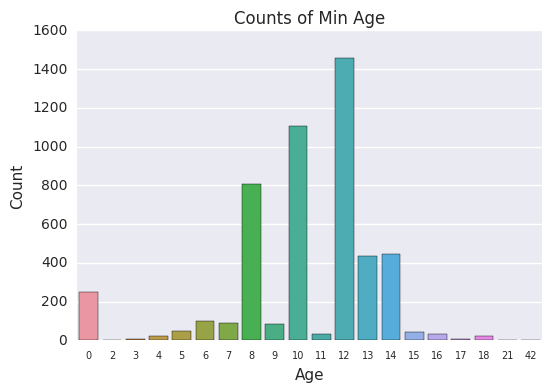

In [80]:
count = frame2['age'].value_counts()

# plot age
%matplotlib inline 
ax = sns.barplot(x=count.index, y = count)
sns.plt.title('Counts of Min Age')
ax.set(xlabel='Age', ylabel='Count')
plt.show()

Minimum ages of 0 or 42 don't seem quite right. Let's print the games to see what's going on.

In [81]:
print("Age is 0:")
print(frame2.loc[frame2['age'] == 0,'names'])
print("Age is 42:")
print(frame2.loc[frame2['age'] == 42, 'names'])

Age is 0:
343                                      Fire in the Lake
360                                      Washington's War
450                                            Cuba Libre
503                                             Churchill
527                                             Container
601                                      Eat Poop You Cat
716                                                 KLASK
719                                         Leaving Earth
808         Falling Sky: The Gallic Revolt Against Caesar
820                                             Forge War
948                       RAF: The Battle of Britain 1940
980                           Plague Inc.: The Board Game
981                                              Kamisado
986     Warfighter: The Tactical Special Forces Card Game
994                              Wings of War: Deluxe Set
997                                     Wealth of Nations
1005    Fighting Formations: Grossdeutschland Motorize...
1113

After looking up several of these games with suspicious ages on the BGG website, it appears that 0 is listed when the age is missing/not provided. And the age = 42 was a joke. Both will be removed. (Ages of 2 and 21 were also checked and proved to be real.)

Now that I know that missing values are listed as 0 in the data, I want to check the other variables as well.

In [82]:
# To quickly check for 0s, describe a variable and look at the min
frame2['weight'].describe()

count    4999.000000
mean        2.344941
std         0.800912
min         0.000000
25%         1.735500
50%         2.288200
75%         2.888050
max         4.904800
Name: weight, dtype: float64

In [83]:
print("Weight is 0:")
print(frame2.loc[frame2['weight'] == 0, 'names'])

Weight is 0:
1476                           Smash Up: Cease and Desist
4380    DC Comics Dice Masters: Green Arrow and The Flash
4520                            Guns & Steel: Renaissance
Name: names, dtype: object


Like age, a weight (complexity) listed as 0 is also a missing/not reported weight. Weights should be on a scale of 1-5 with 1 being the least complex and 5 being the most.

In [84]:
# Remove rows with missing values for age and weight, accounting for mising values coded as 0
cols = ['age', 'weight']
for column in cols:
    frame2.loc[frame2[column] == 0, column] = np.nan
frame2.dropna(axis = 0, inplace = True)

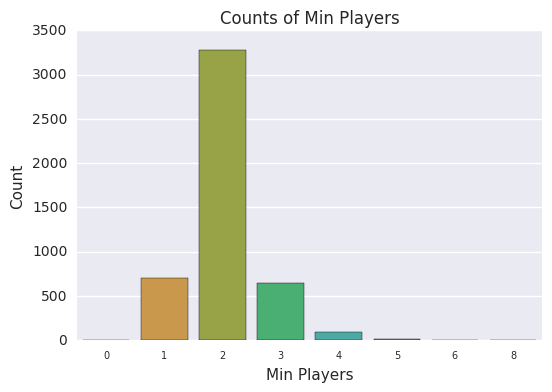

2    3278
1     701
3     642
4      96
5      13
6       6
8       5
0       5
Name: min_players, dtype: int64


In [85]:
# Checking on min players
count = frame2['min_players'].value_counts()

# plot player count range
%matplotlib inline 
ax = sns.barplot(x=count.index, y = count)
sns.plt.title('Counts of Min Players')
ax.set(xlabel='Min Players', ylabel='Count')
plt.show()

print(frame2['min_players'].value_counts())

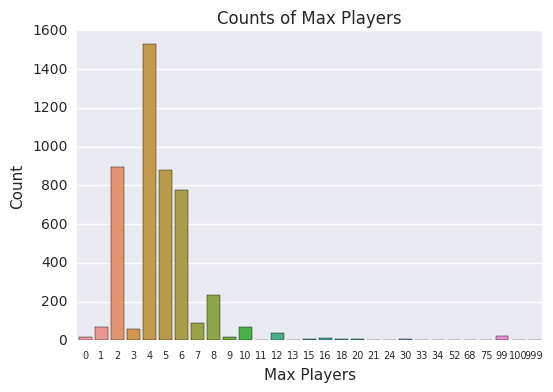

4      1531
2       895
5       877
6       776
8       232
7        92
10       69
1        67
3        61
12       38
99       22
9        15
0        15
16       10
20        9
15        8
18        8
30        5
24        3
21        2
33        2
11        2
68        1
52        1
100       1
13        1
34        1
75        1
999       1
Name: max_players, dtype: int64

In [86]:
count = frame2['max_players'].value_counts()

# plot player count range
%matplotlib inline 
ax = sns.barplot(x=count.index, y = count)
sns.plt.title('Counts of Max Players')
ax.set(xlabel='Max Players', ylabel='Count')
plt.show()

frame2['max_players'].value_counts()

There are a handful of 0s for minimum players, but it's odd that the number of 0s is smaller in min players than max players.

In [87]:
print("Minimum players is 0:")
print(frame2.loc[frame2['min_players']==0, 'names'])

print("Maximum players is 0:")
print(frame2.loc[frame2['max_players']==0, 'names'])

Minimum players is 0:
3901                      Piecepack
4144    New Rules for Classic Games
4441                             88
4479        The Sword and the Flame
4814      Fear God and Dread Nought
Name: names, dtype: object
Maximum players is 0:
2738               25 Words or Less
2817                 Dystopian Wars
3355                  The Big Taboo
3569                     HorrorClix
3901                      Piecepack
4144    New Rules for Classic Games
4240               Beyond the Rhine
4353               Next War: Taiwan
4441                             88
4479        The Sword and the Flame
4503                   Black Powder
4527         Deadzone (2nd Edition)
4539                   Iron and Oak
4794         Napoleon's Last Gamble
4814      Fear God and Dread Nought
Name: names, dtype: object


All the games with a 0 for minimum players also have a 0 for maximum players and are true missings. The remaining games with 0 for max players are games which require the specific number of players listed in min players.

In [88]:
# drop missing min players (also takes care of the true missing max players)
frame2.loc[frame2['min_players'] == 0, 'min_players'] = np.nan
frame2.dropna(axis = 0, inplace = True)

# replace remaining max players = 0 with the min players number
frame2.loc[frame2['max_players'] == 0, 'max_players'] = frame2['min_players']

# drop games with 99+ for max players (99+ represents unlimited)
frame2.loc[frame2['max_players'] > 98, 'max_players'] = np.nan
frame2.dropna(axis = 0, inplace = True)

In [89]:
# An alternative to including both min and max could be a player range, but I don't like it as much.
frame2['player_count_range'] = frame2['min_players'].astype('str') + '-' + frame2['max_players'].astype('str')
frame2['player_count_range'].describe()

count        4717
unique         74
top       2.0-4.0
freq         1151
Name: player_count_range, dtype: object

In [90]:
#count = frame['player_count_range'].value_counts()

## plot player count range
#%matplotlib inline 
#ax = sns.barplot(x=count.index, y = count)
#sns.plt.title('Counts of Player Count Range')
#ax.set(xlabel='Player Count Range')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.show()

Year is a slightly problematic variable right now. The large range from -3000 (Backgammon, a game considered to be 5000 years old) to 2018 (Rising Sun, a game to be officially released next year but first sold on Kickstarter) and low frequency of games in earlier years. Games released in earlier years are likely to be different in meaningful ways from more recent games that wouldnât be captured by this dataset and are more likely to be owned because they were passed down rather than purchased. For these reasons, I restrict the dataset to 1990 and later, dropping anything released before 1990 as well as the 2018 game. 

Recent years have also seen a rising trend in the number of board games made and sold: https://www.theguardian.com/technology/2014/nov/25/board-games-internet-playstation-xbox

In [91]:
frame2['year'].describe()

count    4717.000000
mean     1998.315243
std       128.895660
min     -3000.000000
25%      2002.000000
50%      2009.000000
75%      2014.000000
max      2018.000000
Name: year, dtype: float64

In [92]:
frame2['year'].value_counts()

 2015    416
 2016    367
 2014    335
 2013    322
 2012    314
 2011    258
 2010    249
 2009    210
 2008    171
 2005    160
 2004    159
 2007    154
 2006    153
 2003    132
 2002    108
 2001     91
 2000     79
 1999     77
 2017     67
 1998     59
 1995     52
 1997     51
 1992     48
 1996     45
 1994     43
 1991     38
 1993     38
 1986     36
 1990     32
 1989     29
        ... 
 2018      1
 1780      1
 1680      1
 1000      1
 700       1
 400       1
 1475      1
 1955      1
 1939      1
 1947      1
 1430      1
 1630      1
 1870      1
 1906      1
 1895      1
 1938      1
 1942      1
 1925      1
 1921      1
 1909      1
 1885      1
 1745      1
 1701      1
-3000      1
-2200      1
 1958      1
 1966      1
 550       1
 1951      1
 1903      1
Name: year, dtype: int64

In [93]:
# drop years before 1900
frame2.loc[frame2['year'] < 1990, 'year'] = np.nan
frame2.dropna(axis = 0, inplace = True)

# drop 2018 game
frame2.loc[frame2['year'] == 2018, 'year'] = np.nan
frame2.dropna(axis = 0, inplace = True)

In [94]:
frame2['year'].describe()

count    4228.000000
mean     2008.575686
std         6.565439
min      1990.000000
25%      2005.000000
50%      2010.000000
75%      2014.000000
max      2017.000000
Name: year, dtype: float64

In [95]:
frame2['year'].value_counts()

2015.0    416
2016.0    367
2014.0    335
2013.0    322
2012.0    314
2011.0    258
2010.0    249
2009.0    210
2008.0    171
2005.0    160
2004.0    159
2007.0    154
2006.0    153
2003.0    132
2002.0    108
2001.0     91
2000.0     79
1999.0     77
2017.0     67
1998.0     59
1995.0     52
1997.0     51
1992.0     48
1996.0     45
1994.0     43
1991.0     38
1993.0     38
1990.0     32
Name: year, dtype: int64

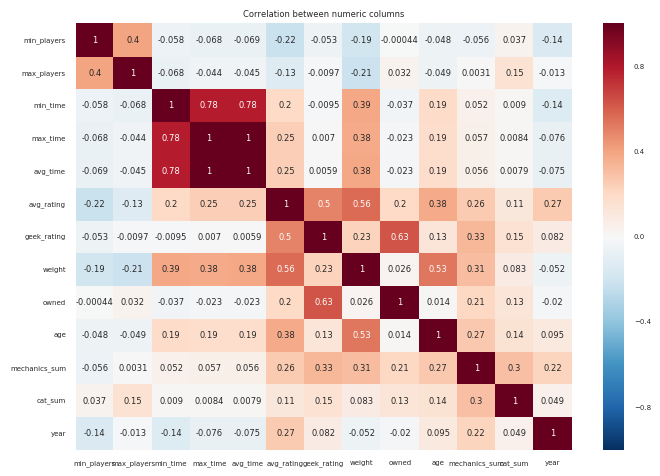

In [96]:
# Checking correlations
cols = ['min_players', 'max_players', 'min_time', 'max_time', 'avg_time', 'avg_rating',
        'geek_rating', 'weight', 'owned', 'age', 'mechanics_sum', 'cat_sum', 'year' ]
cm = np.corrcoef(frame2[cols].values.T)
sns.set(font_scale=.5)
hm = sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)
sns.plt.title('Correlation between numeric columns')
plt.show()

From the above correlation we can see that min_time, max_time, and avg_time are all highly correlated. Avg_time and max_time are essentially perfectly correlated. When actually looking at the data, these three time variables are often all the same; avg_time and max_time are even more frequently identical. To simplify the model, only avg_time will be included. 

Other than the time variables, there aren't many other strong correlations. Unsurprisingly, as year goes up, the number who own a game goes down slightly. But newer games do seem to get more favorable ratings. Complexity (weight) appears it might matter some as well - as weight goes up, so does avg_rating and geek_rating. More mechanics (mechanics_sum) is also positively correlated with weight and is also correlated with better ratings.

In [118]:
frame2.head()

,rank,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,age,mechanic,owned,category,designer,weight,mechanics_sum,cat_sum
0,1,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66905,8.48904,18009,13,"Action Point Allowance System, Co-operative Pl...",29472,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8076,7,2
1,2,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.72977,8.30744,7309,14,"Action Point Allowance System, Auction/Bidding...",10007,"Card Game, Civilization, Economic",Vlaada ChvÃ¡til,4.3093,4,3
2,3,12333,Twilight Struggle,2,2,180,180,180,2005,8.35745,8.22021,27403,13,"Area Control / Area Influence, Campaign / Batt...",37382,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5317,5,3
3,4,120677,Terra Mystica,2,5,150,60,150,2012,8.29627,8.15458,24267,12,"Route/Network Building, Variable Phase Order, ...",27948,"Civilization, Economic, Fantasy, Territory Bui...","Jens DrÃ¶gemÃ¼ller, Helge Ostertag",3.9387,3,4
4,5,174430,Gloomhaven,1,4,150,90,150,2017,9.08970,8.15151,3978,12,"Action / Movement Programming, Campaign / Batt...",6057,"Adventure, Economic, Exploration, Fantasy, Fig...",Isaac Childres,3.7028,9,6


In [98]:
frame2.dtypes

rank                    int64
game_id                 int64
names                  object
min_players           float64
max_players           float64
avg_time                int64
min_time                int64
max_time                int64
year                  float64
avg_rating            float64
geek_rating           float64
num_votes               int64
age                   float64
mechanic               object
owned                   int64
category               object
designer               object
weight                float64
mechanics_sum           int64
cat_sum                 int64
player_count_range     object
dtype: object

Finally, let's check the distributions of our potential lables just so we know what they look like and can choose one of the three potentially interesting labels based on the distribution.

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


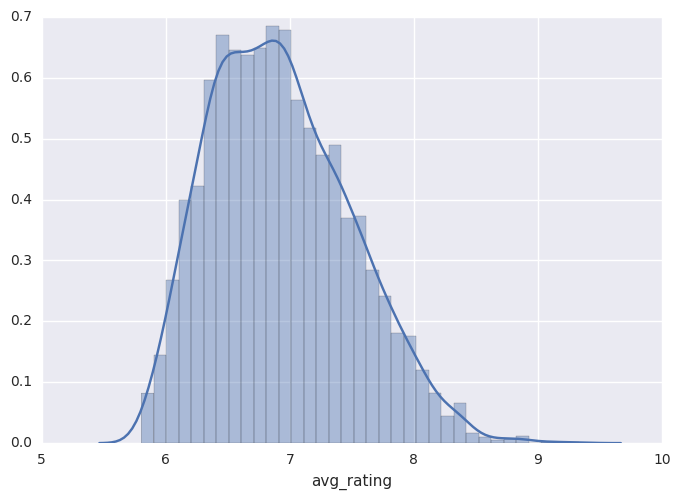

In [99]:
# distribution of average rating
x = frame2['avg_rating']
sns.set(font_scale=1)
sns.distplot(x)

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


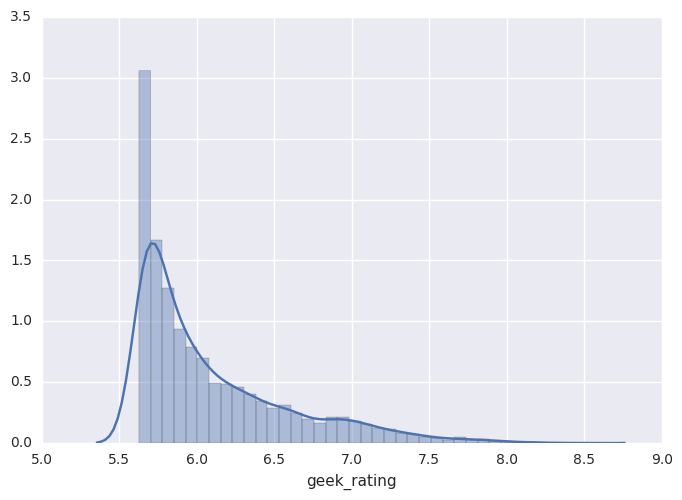

In [100]:
# distribution of geek rating
x = frame2['geek_rating']
sns.distplot(x)

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


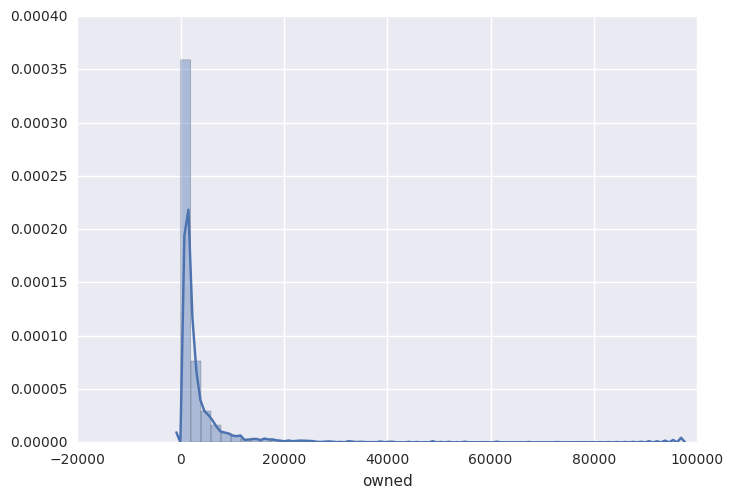

In [101]:
# distribution of owned
x = frame2['owned']
sns.distplot(x)

After looking at all three distributions, I'm focusing my analysis on average rating because it has a more normal distribution of ratings, rather than sharp cut-offs.

In [105]:
# dump out to csv file to use in model (https://stackoverflow.com/questions/35973168/how-could-i-save-dataset-from-ipython-notebook-in-azure-ml-studio)
ws.datasets.add_from_dataframe(frame2, 'GenericCSV', 'bgg_cleaner.csv', 'Uotput results')

bgg_cleaner.csv

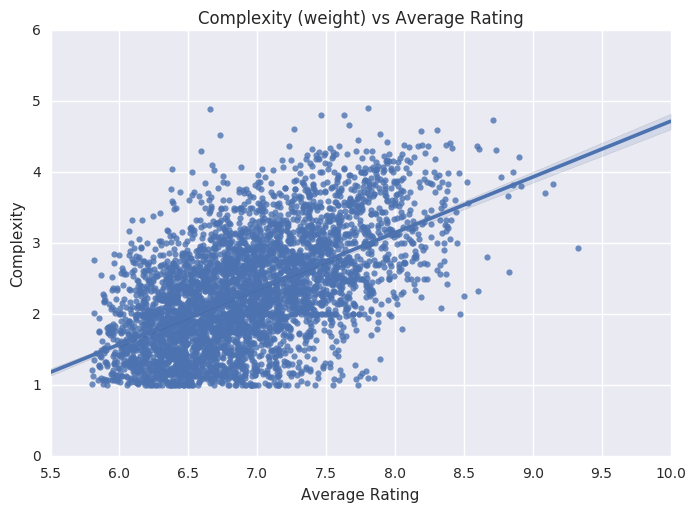

In [106]:
# plot relationship between complexity and average rating (https://seaborn.pydata.org/generated/seaborn.regplot.html)
ax = sns.regplot(x=frame2["avg_rating"], y=frame2["weight"])
sns.plt.title('Complexity (weight) vs Average Rating')
ax.set(xlabel='Average Rating', ylabel='Complexity')
plt.show()

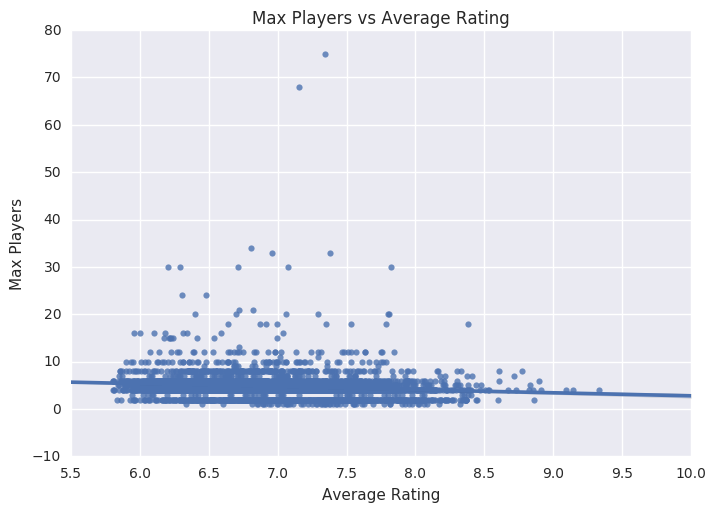

In [107]:
# plot the relationship between maximum players and average rating
ax = sns.regplot(x=frame2["avg_rating"], y=frame2["max_players"])
sns.plt.title('Max Players vs Average Rating')
ax.set(xlabel='Average Rating', ylabel='Max Players')
plt.show()

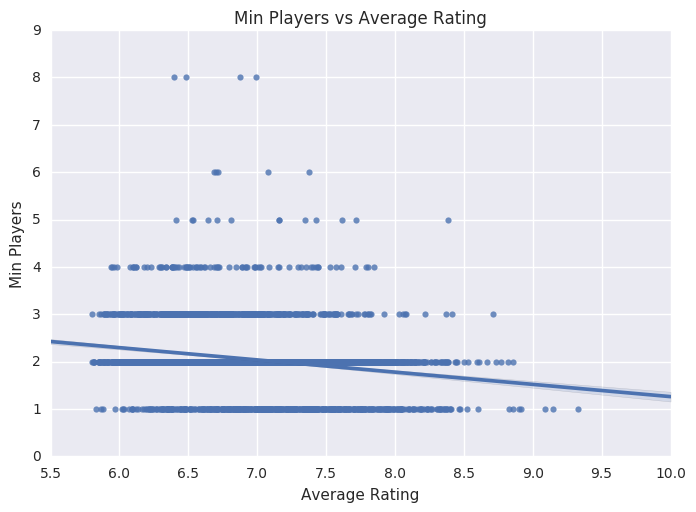

In [108]:
# plot the relationship between minimum players and average rating
ax = sns.regplot(x=frame2["avg_rating"], y=frame2["min_players"])
sns.plt.title('Min Players vs Average Rating')
ax.set(xlabel='Average Rating', ylabel='Min Players')
plt.show()

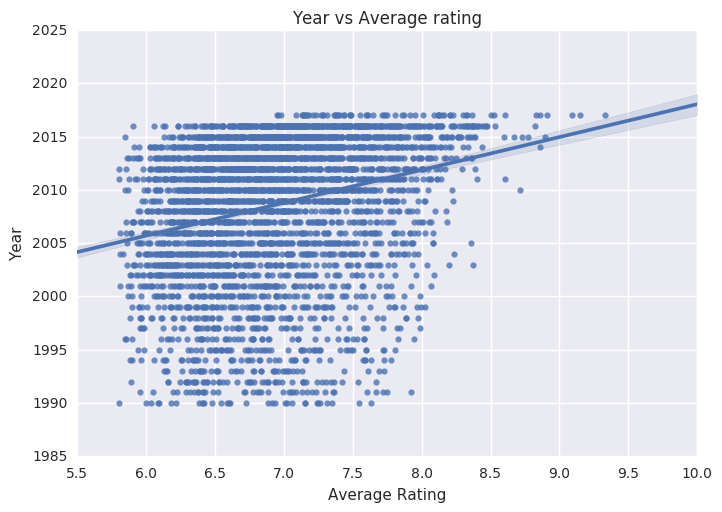

In [109]:
# plot the relationship between year and average rating
ax = sns.regplot(x=frame2["avg_rating"], y=frame2["year"])
sns.plt.title('Year vs Average rating')
ax.set(xlabel='Average Rating', ylabel='Year')
plt.show()

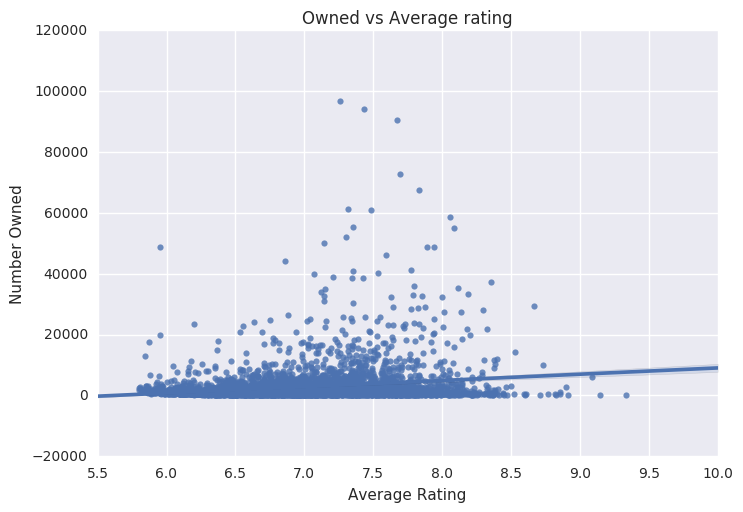

In [110]:
# plot the relationship between owned and average rating
ax = sns.regplot(x=frame2["avg_rating"], y=frame2["owned"])
sns.plt.title('Owned vs Average rating')
ax.set(xlabel='Average Rating', ylabel='Number Owned')
plt.show()

As is clear from the graph and correlation table, none of the relationships between these variables and average rating is especially strong. 

### Modeling
After creating a machine learning model using the cleaned variables from above (i.e. age, year, weight, minimum number of players, maximum number of players, average play time, mechanics sum, and category sum), I found a coefficient of determination of .508. This suggests that the model is currently capturing about half of the variation in average rating. The final model was a Boosted Decision Tree Regression model with tuned hyperparameters as it produced a better model than a linear regression model with OLS.

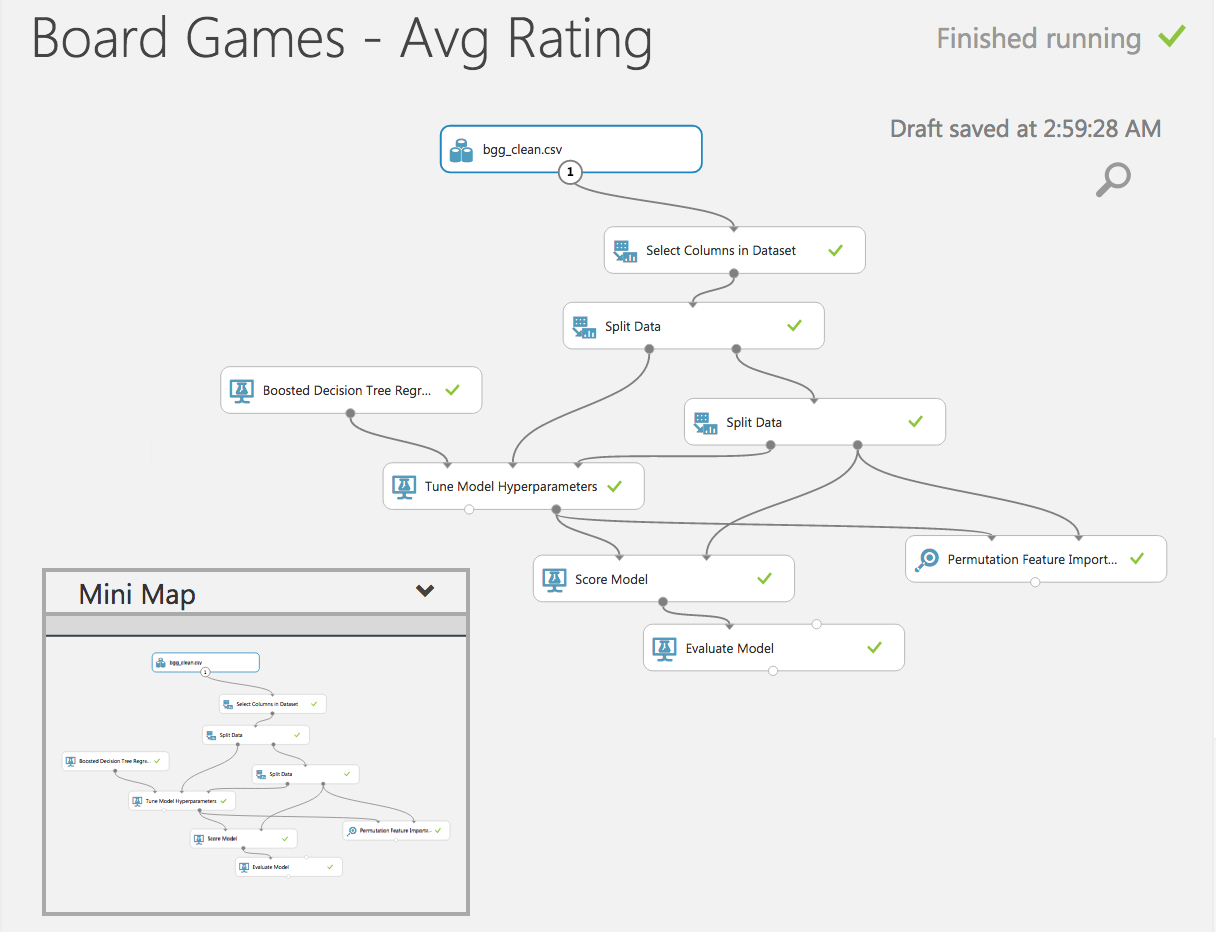

In [1]:
from IPython.display import Image
Image('https://i.imgur.com/GYrWX7Z.png')

### Conclusion
Analysis into feature importance using Permutation Feature Selection (results shown below) showed that weight/complexity was the most important driver of higer average ratings. This was followed by the year a game was released, and then the maximum number of players. The remaining variables were of low (but not zero) importance. As we could see in graphs above, newer games and those that were more complex were correlated with higher ratings.

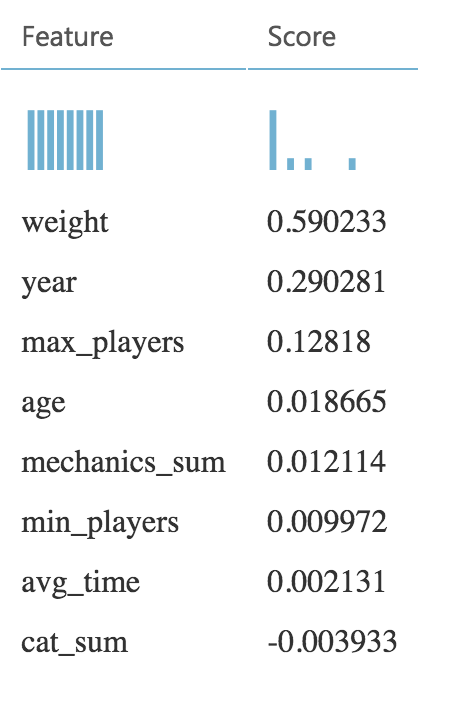

In [2]:
Image('https://i.imgur.com/8bYgsSw.png')

In summary, with board games making a return in popularity, it is valuable to identify which characteristics of the game score favorably with consumers, identified by ratings. Higher ratings are somewhat correlated with purchase. After visualizing and cleaning up the data and creating a regression model, it was abundantly clear that the complexity of a game was the most important driver of ratings - more complex games are rated more highly on average. Newer games are also rated more highly and it would be worth exploring whether the correlation is just because the game is new or if it is capturing other underlying characteristics about how games are created and designed today.